# Exploratory Data Analysis and Data visualization
 Heart Diseases Analysis

data source link- https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Importing Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot


Bad key text.latex.unicode in file C:\Users\nehap\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\nehap\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\nehap\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/m

# reading the data

In [2]:
data = pd.read_csv('D:\\heart.csv')
# getting the dimension of data
data.shape

(303, 14)

Data Description

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced ('Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic')

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement ('0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria')

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [3]:
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [4]:
data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [9]:
data=data.sort_values(by=['age'])
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
72    29    1   1       130   204    0        0      202      0      0.0   
58    34    1   3       118   182    0        0      174      0      0.0   
125   34    0   1       118   210    0        1      192      0      0.7   
239   35    1   0       126   282    0        0      156      1      0.0   
65    35    0   0       138   183    0        1      182      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
151   71    0   0       112   149    0        1      125      0      1.6   
60    71    0   2       110   265    1        0      130      0      0.0   
129   74    0   1       120   269    0        0      121      1      0.2   
144   76    0   2       140   197    0        2      116      0      1.1   
238   77    1   0       125   304    0        0      162      1      0.0   

     slope  ca  thal  target  
72       2   0     2       1  
58       2   0     2       1  
125      2   0     2       1  
239      2   0     3       0  
65       2   0     2       1  
..     ...  ..   ...     ...  
151      1   0     2       1  
60       2   1     2       1  
129      2   1     2       1  
144      1   0     2       1  
238      2   3     2       0  

[302 rows x 14 columns]

In [10]:
data=data.drop_duplicates()
data.shape

(302, 14)

# Checking missing values

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# describing the data
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Dataset Profiling (summary) 

In [13]:
profile = pandas_profiling.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# PLOT 1

In [14]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)
py.iplot(figure, config={'scrollzoom': True})

In [15]:
# correalation between parameters
data.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trestbps  0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalach  -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exang     0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slope    -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
ca        0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thal      0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
target   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trestbps -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalach   0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exang    -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slope     0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
ca       -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thal     -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
target    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

              thal    target  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trestbps  0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalach  -0.094910  0.419955  
exang     0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slope    -0.103314  0.343940  
ca        0.160085 -0.408992  
thal      1.000000 -0.343101  
target   -0.343101  1.000000

# PLOT 2

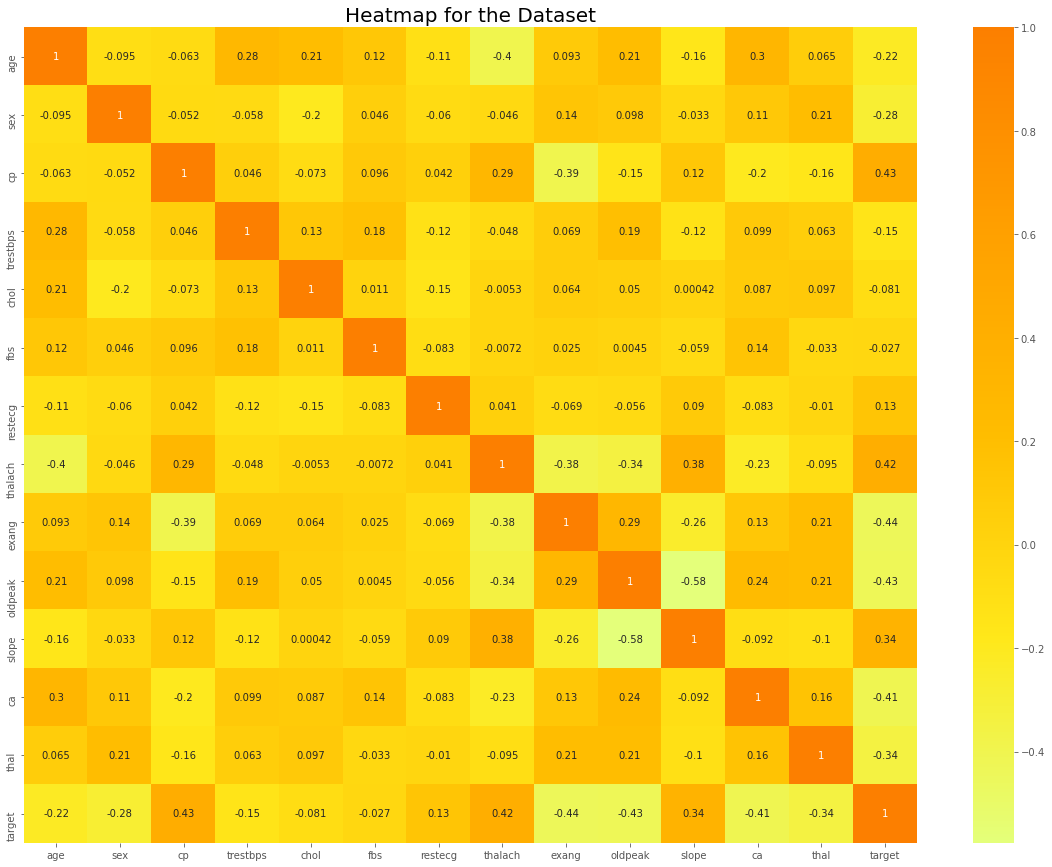

In [16]:
# making a heat map
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

from the above heat map is to show the correlations amongst the different attributes of the given dataset.
above plot shows that almost all of the features/attributes given in the dataset are very less correlated with each other.
only some features are highly correlated.This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

# PLOT 2 (Univariate Analysis)

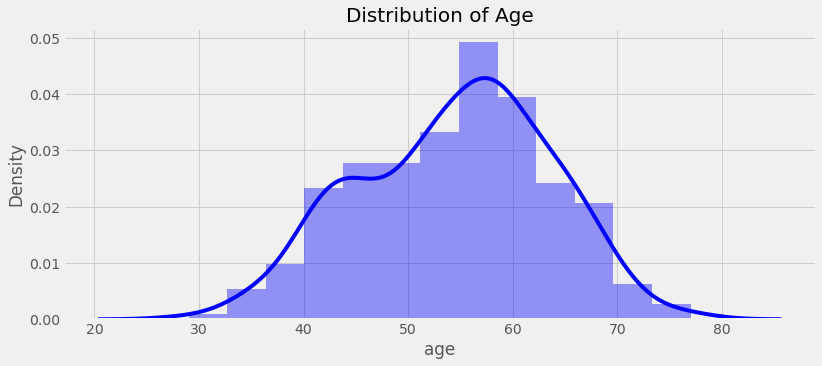

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 5)
sns.distplot(data['age'], color = 'blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

From the above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients.
Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.
As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. 

# PLOT 3

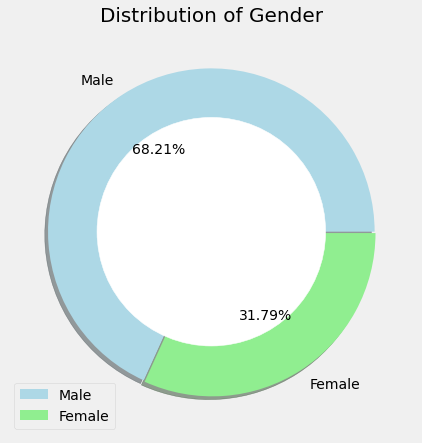

In [18]:
#plotting a donut chart for visualizing each of the recruitment channel's share

size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

From the above Pie chart, which shows us the distribution of Gender in the Heart diseases. 
By looking at the plot, we can assume that Males are two times more likely to suffer from heart diseases in comparison to females.
According to our study, From all the Entries in our dataset 68% of the patients are men whereas only 32% are women.
Also we can say more number of men took participation in heart disease check ups

# PLOT 4 (Bivariate Analysis)

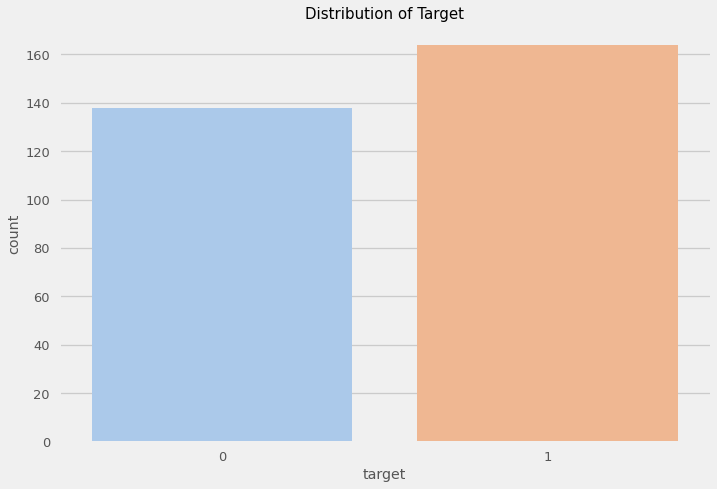

In [19]:
# plotting the target attribute
plt.rcParams['figure.figsize'] = (7, 3)
plt.style.use('seaborn-talk')
sns.countplot(data['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 15)
plt.show()

Here the dataset is quite balanced with almost equal no. of Positive and Negative Classes. 
Let's say the Positive Class says that the patient is suffering from the disease and the Negative class says that the patient is not suffering from the disease.
So, we can cearly say that most of the pepole are suffering from heart disease.


# PLOT 5

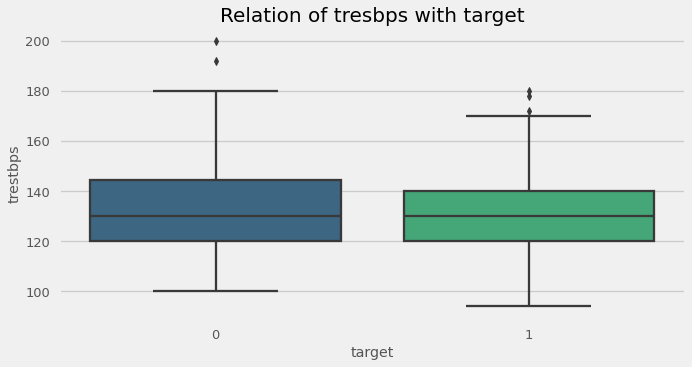

In [20]:
# tresbps vs target
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

tresbps: Resting Blood Pressure

From the above Bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

# PLOT 6

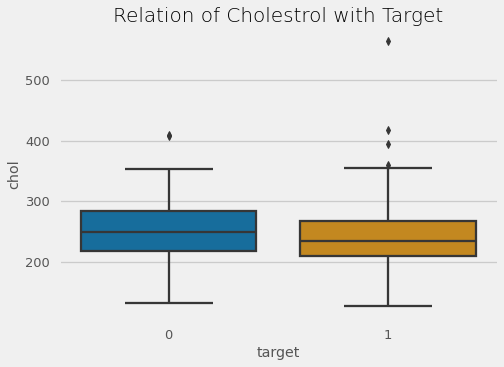

In [21]:
# cholestrol vs target
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

From the above Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0 (likely to not suffer from the heart diseases).

Hence, we can say from the above plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

# PLOT 7

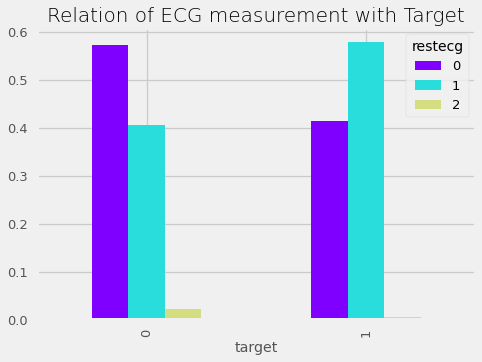

In [22]:
# Resting electrocardiographic measurement vs target
plt.rcParams['figure.figsize'] = (7, 5)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = False, color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot is column bar chart representing target vs ECG Measurements
From the above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 (normal) whereas more number of people have restecg value 1(having ST-T wave abnormality) in case of more likelihood of suffering from a heart disease.

This is the Map, between Target and Maximum Heart Rate shows that the patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.

This implies it is very important to keep our heart rates low, to keep ourselves healthy and safe from any dangerous heart diseases.

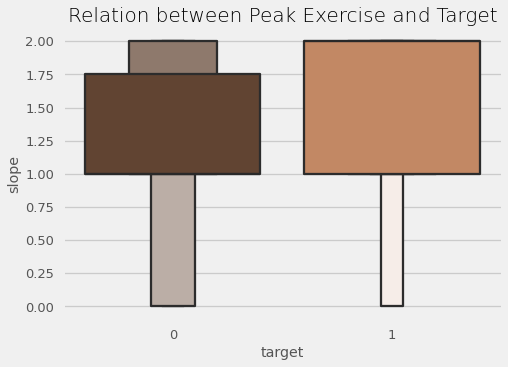

In [23]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxenplot(data['target'], data['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

Slope : 0 refers to upsloping, 1 refers to flat Exercises pattern.

This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises. Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

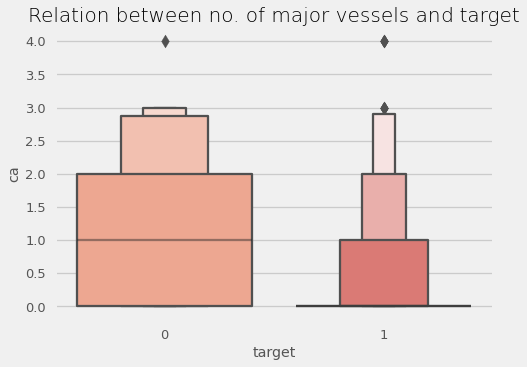

In [24]:
#ca: The number of major vessels (0-3)
sns.boxenplot(data['target'], data['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

The above plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels whereas the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

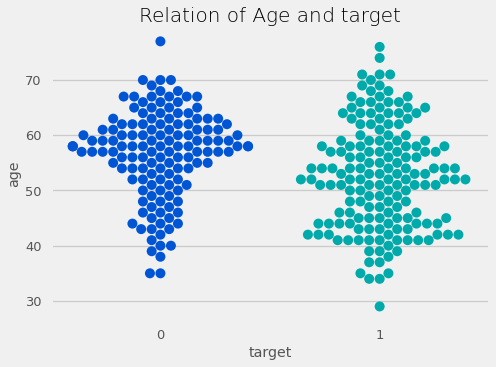

In [25]:
# relation between age and target
plt.rcParams['figure.figsize'] = (7, 5)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

From the above Swarm plot between the target and the age of the patients, i am not able to find any clue or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

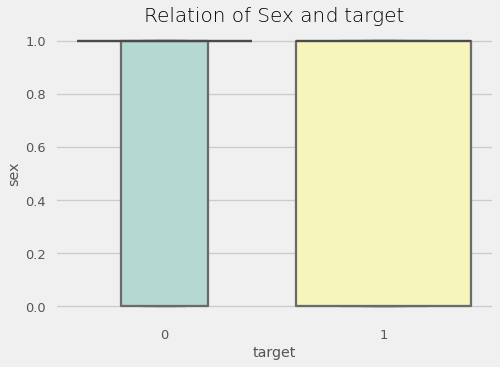

In [26]:
# relation between sex and target
plt.rcParams['figure.figsize'] = (7, 5)
sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 10)
plt.show()

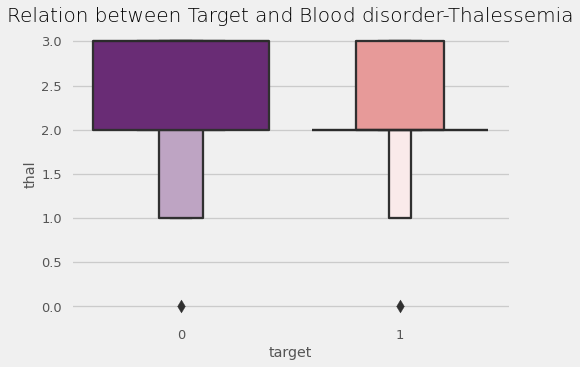

In [27]:
# checking the relation between 
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

# multi-variate analysis

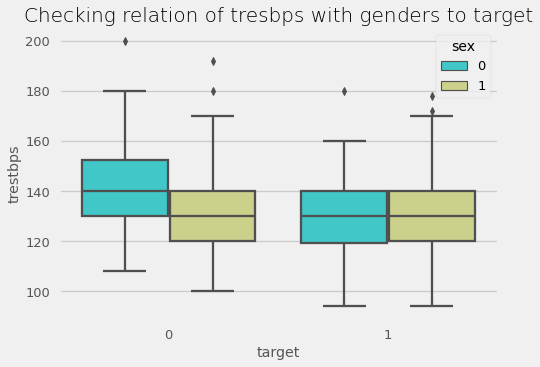

In [28]:
sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

In the above Box plot between Target and tresbps wrt Gender, shows that Women have higher tresbps than men in case of not suffering from any heart diseases, whereas men and women have almost equal tresbps in case of suffering from a heart diseases. Also, In case of suffering from heart diseases, patients have a slightly lower tresbps in comparison to the patients who are not suffering from heart diseases.

In [29]:
trace = go.Scatter3d(x = data['chol'], y = data['trestbps'],z = data['age'],name = 'Marvel',mode = 'markers',marker = dict(size = 10,color = data['age']))
df = [trace]
layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(l=0, r=0,b=0,t=0),scene = dict(xaxis = dict(title  = 'Cholestrol'),yaxis = dict(title  = 'Heart Rate'),zaxis = dict(title  = 'Age')))
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

In [30]:
# let's change the names of the  columns for better understanding
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [31]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'


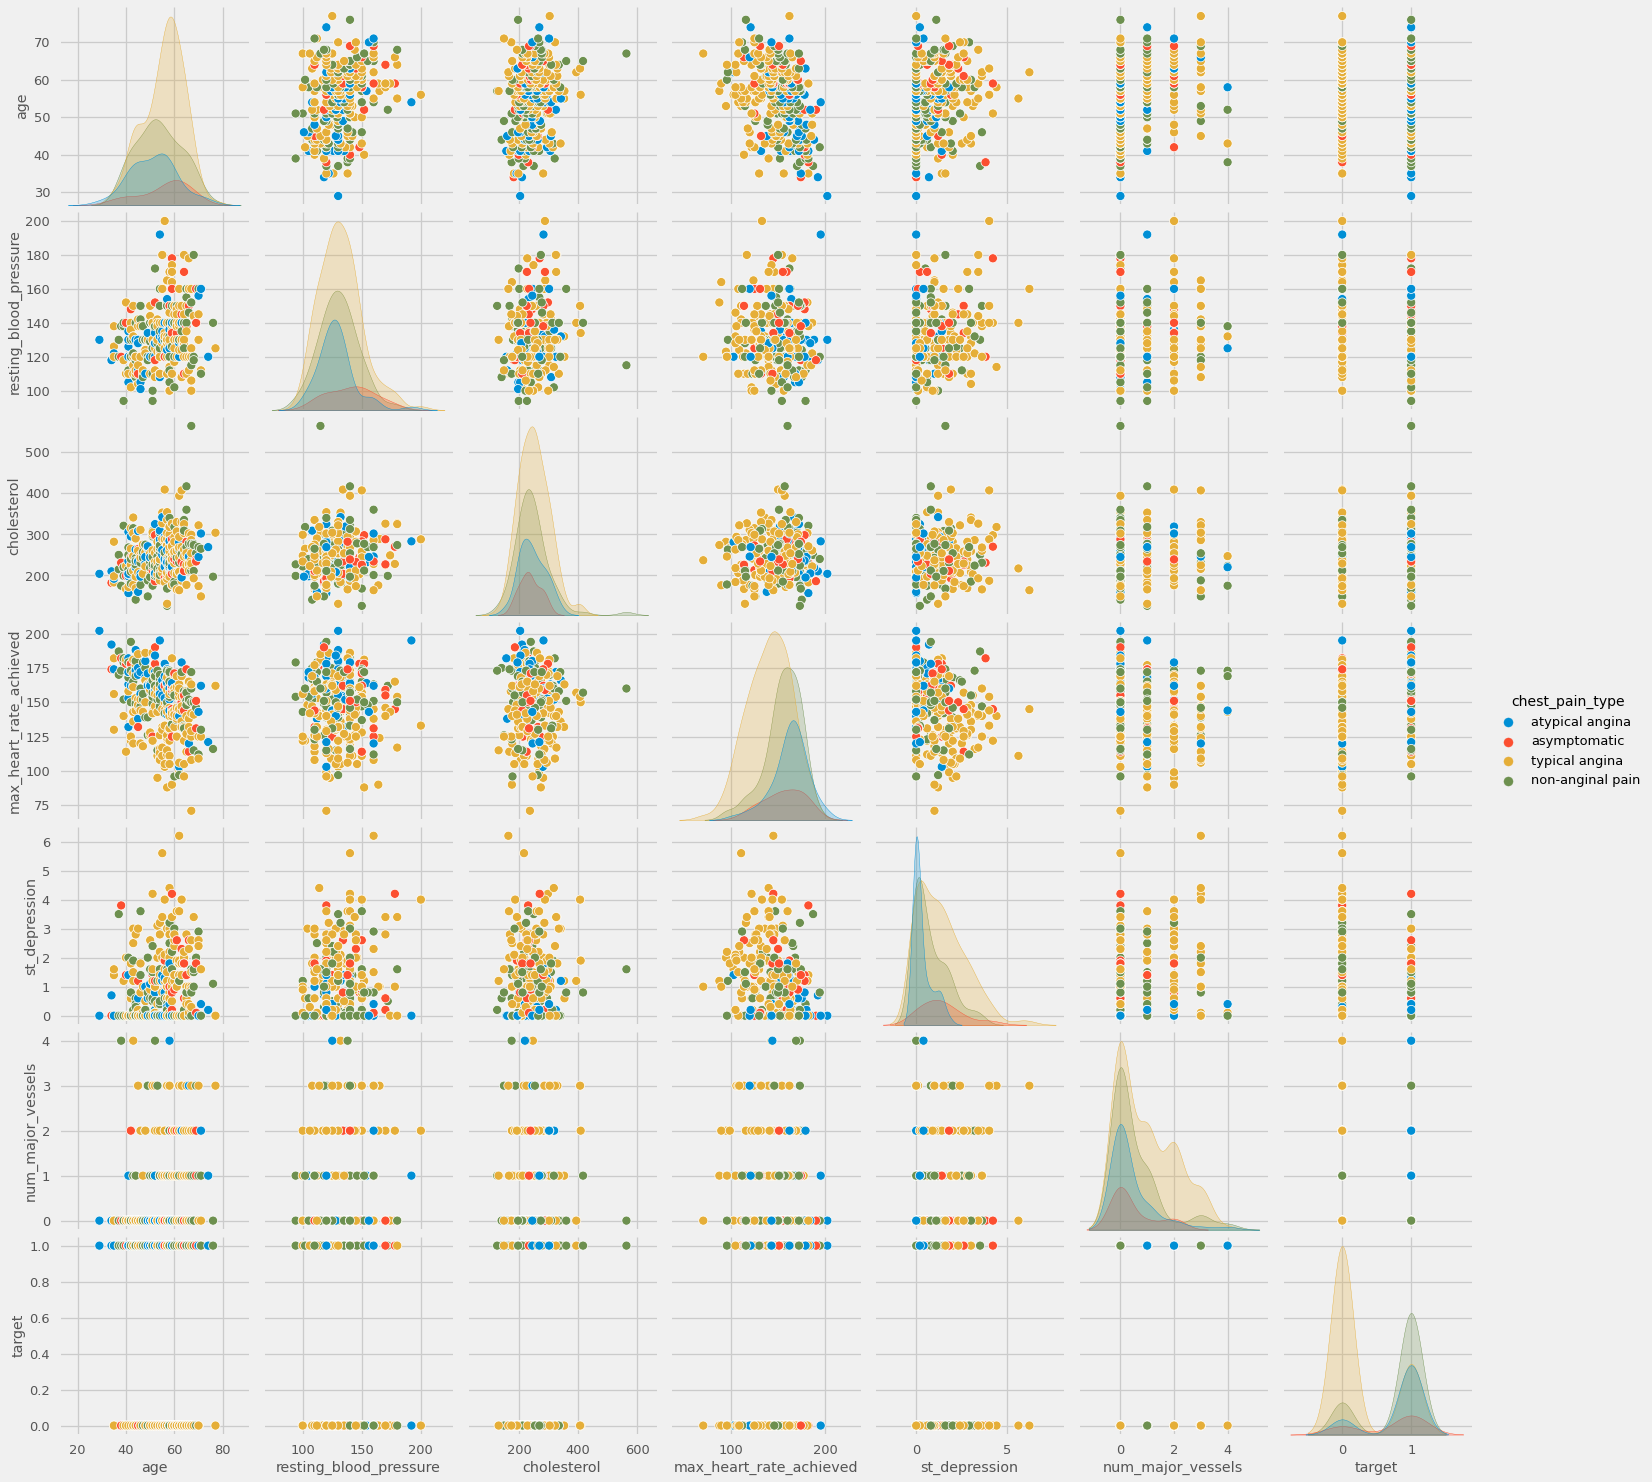

In [32]:
sns.pairplot(data,hue = 'chest_pain_type' , size=3)